In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#only for notebook
%matplotlib inline

In [2]:
data=pd.read_csv('googleplaystore.csv')
data.head() # show first 5 rows from dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Starting cleaning data

In [3]:
# Drop null values
data=data.dropna()
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.columns=data.columns.str.replace(' ','_')

In [5]:
print("Shape of data: {}".format(data.shape))

Shape of data: (9360, 13)


# 1. Size

In [6]:
data.Size.value_counts().head()

Varies with device    1637
14M                    165
12M                    161
11M                    159
15M                    159
Name: Size, dtype: int64

In [7]:
# It can be seen that data has metric prefixes (Kilo and Mega) along with another string. 
#Replacing k and M with their values to convert values to numeric.
data.Size=data.Size.str.replace('k','e+3')
data.Size=data.Size.str.replace('M','e+6')

In [8]:
data.Size.head()

0     19e+6
1     14e+6
2    8.7e+6
3     25e+6
4    2.8e+6
Name: Size, dtype: object

###### Now, we have some two types of values in our Size data.

1 - exponential values (not yet converted to string)

2 - Strings (that cannot be converted into numeric)

In [9]:
def is_convertable(v):
    try:
        float(v)
        return True
    except ValueError:
        return False
temp=data.Size.apply(lambda x:is_convertable(x))
temp.head()

0    True
1    True
2    True
3    True
4    True
Name: Size, dtype: bool

In [10]:
# Now checking unique non numeric values (~ temp) in Size

data.Size[~temp].value_counts()

Varies with device    1637
Name: Size, dtype: int64

In [11]:
# replace 'Varies with device' by nan

data.Size=data.Size.replace('Varies with device',np.nan)

# Converting 1000+ to 1000, to make it numeric
data.Size=data.Size.replace('1000+',1000)

In [12]:
# Convert the cleaned Size data to numeric type
data.Size=pd.to_numeric(data.Size)

##### Visualize frequency of different size

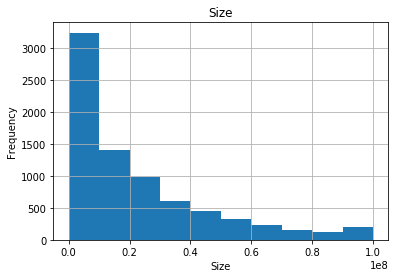

In [13]:
data.hist(column='Size')
plt.xlabel('Size')
plt.ylabel('Frequency')

# Checking unique values in Installs data

In [14]:
print(data.Installs.value_counts())
print('Size of Installs :',len(data.Installs.value_counts()))

1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64
Size of Installs : 19


It can be seen that there are 19 unique values

* remove '+' which shall be removed to convert these into numeric types

In [15]:
data.Installs=data.Installs.apply(lambda x:x.strip('+'))
data.Installs=data.Installs.apply(lambda x:x.replace(',',''))
data.Installs.value_counts()

1000000       1576
10000000      1252
100000        1150
10000         1009
5000000        752
1000           712
500000         537
50000          466
5000           431
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

In [16]:
# Checking if data is converted to numeric
data.Installs.str.isnumeric().sum()

9360

In [17]:
data.Installs=pd.to_numeric(data.Installs)

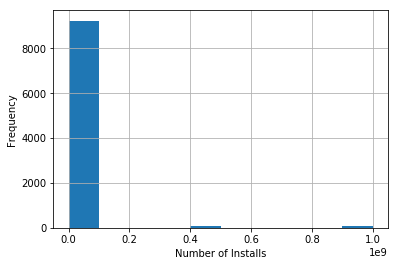

In [18]:
data.Installs.hist()
plt.xlabel('Number of Installs')
plt.ylabel('Frequency')

# Making sure that all values of reviews are numeric

In [19]:
data.Reviews.str.isnumeric().sum()

9360

In [20]:
# check for non-numeric rows
data[~data.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


No rows returned, that means every rows is in numeric form

In [21]:
data.Reviews=data.Reviews.replace(data.Reviews[~data.Reviews.str.isnumeric()],np.nan)

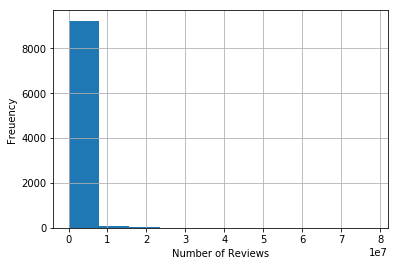

In [22]:
data.Reviews=pd.to_numeric(data.Reviews)
data.Reviews.hist();
plt.xlabel('Number of Reviews')
plt.ylabel('Freuency')

# Rating

For entries to be right we need to make sure they fall within the range 1 to 5

In [23]:
print('Range: ',data.Rating.min(),'-',data.Rating.max())

Range:  1.0 - 5.0


In [24]:
data.Rating.dtype

dtype('float64')

Data is already numeric, check for the null values

In [25]:
print(data.Rating.isna().sum(),'null values')

0 null values


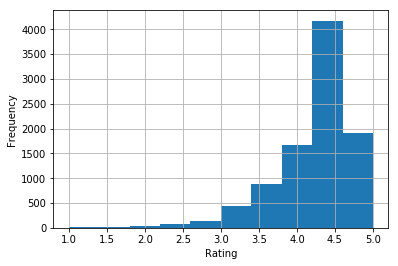

In [26]:
# Visualize Ratings
data.Rating.hist()
plt.xlabel('Rating')
plt.ylabel('Frequency')

In [27]:
data.Type.value_counts()

Free    8715
Paid     645
Name: Type, dtype: int64

Every thing is fine here. No unwanted data

# Price

Checking for unique values of price, along with any abnormalities

In [28]:
data.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

'$' symbols has to be remove to convert it to numeric

In [29]:
data.Price=data.Price.apply(lambda x:x.strip('$'))

In [30]:
data.Price.unique()

array(['0', '4.99', '3.99', '6.99', '7.99', '5.99', '2.99', '3.49',
       '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00', '24.99',
       '11.99', '79.99', '16.99', '14.99', '29.99', '12.99', '2.49',
       '10.99', '1.50', '19.99', '15.99', '33.99', '39.99', '3.95',
       '4.49', '1.70', '8.99', '1.49', '3.88', '399.99', '17.99',
       '400.00', '3.02', '1.76', '4.84', '4.77', '1.61', '2.50', '1.59',
       '6.49', '1.29', '299.99', '379.99', '37.99', '18.99', '389.99',
       '8.49', '1.75', '14.00', '2.00', '3.08', '2.59', '19.40', '3.90',
       '4.59', '15.46', '3.04', '13.99', '4.29', '3.28', '4.60', '1.00',
       '2.95', '2.90', '1.97', '2.56', '1.20'], dtype=object)

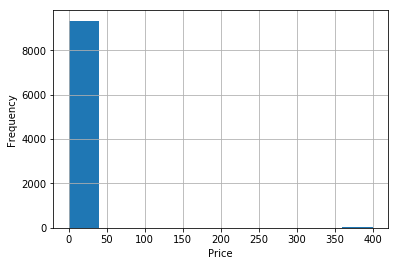

In [31]:
# Plot a histogram to visualize frequency
data.Price=pd.to_numeric(data.Price)
data.Price.hist()
plt.xlabel('Price')
plt.ylabel('Frequency')

# Category

Now lets inspect the category by looking into the unique terms.

In [32]:
data.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

No repetition/false data here

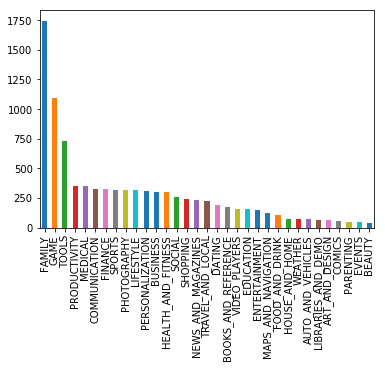

In [33]:
data.Category.value_counts().plot(kind='bar')

# Content Rating

Checking unique terms in Content Rating Categories, and for repetitive or abnormal data.

In [34]:
data.Content_Rating.unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [35]:
data.Content_Rating.unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

No abnormalities or repetition found

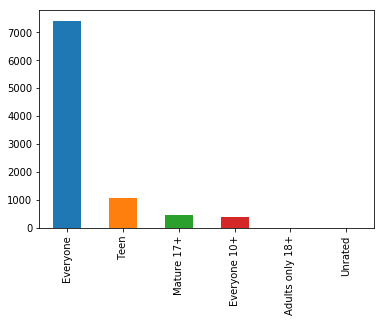

In [36]:
data.Content_Rating.value_counts().plot(kind='bar')

# Genres

Checking for unique values, abnormality or repetition in data

In [37]:
data.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

In [38]:
sep=';'
rest=data.Genres.apply(lambda x:x.split(sep)[0])
data['Pri_Genres']=rest
data.Pri_Genres.head()

0    Art & Design
1    Art & Design
2    Art & Design
3    Art & Design
4    Art & Design
Name: Pri_Genres, dtype: object

In [39]:
rest=data.Genres.apply(lambda x:x.split(sep)[-1])
rest.unique()
data['Sec_Genres']=rest
data.Sec_Genres.head()

0    Art & Design
1    Pretend Play
2    Art & Design
3    Art & Design
4      Creativity
Name: Sec_Genres, dtype: object

In [40]:
grouped=data.groupby(['Pri_Genres','Sec_Genres'])
grouped.size().head(15)

Pri_Genres       Sec_Genres        
Action           Action                358
                 Action & Adventure     17
Adventure        Action & Adventure     13
                 Adventure              73
                 Brain Games             1
                 Education               2
Arcade           Action & Adventure     15
                 Arcade                207
                 Pretend Play            1
Art & Design     Art & Design           55
                 Creativity              7
                 Pretend Play            2
Auto & Vehicles  Auto & Vehicles        73
Beauty           Beauty                 42
Board            Action & Adventure      3
dtype: int64

Generating a two table to better understand the relationship between primary and secondary categories of Genres

In [41]:
twowaytable=pd.crosstab(index=data['Pri_Genres'],columns=data['Sec_Genres'])
twowaytable.head()

Sec_Genres,Action,Action & Adventure,Adventure,Arcade,Art & Design,Auto & Vehicles,Beauty,Board,Books & Reference,Brain Games,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
Pri_Genres,,,,,,,,,,,,,,,,,,,,,
Action,358,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adventure,0,13,73,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Arcade,0,15,0,207,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Art & Design,0,0,0,0,55,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Auto & Vehicles,0,0,0,0,0,73,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


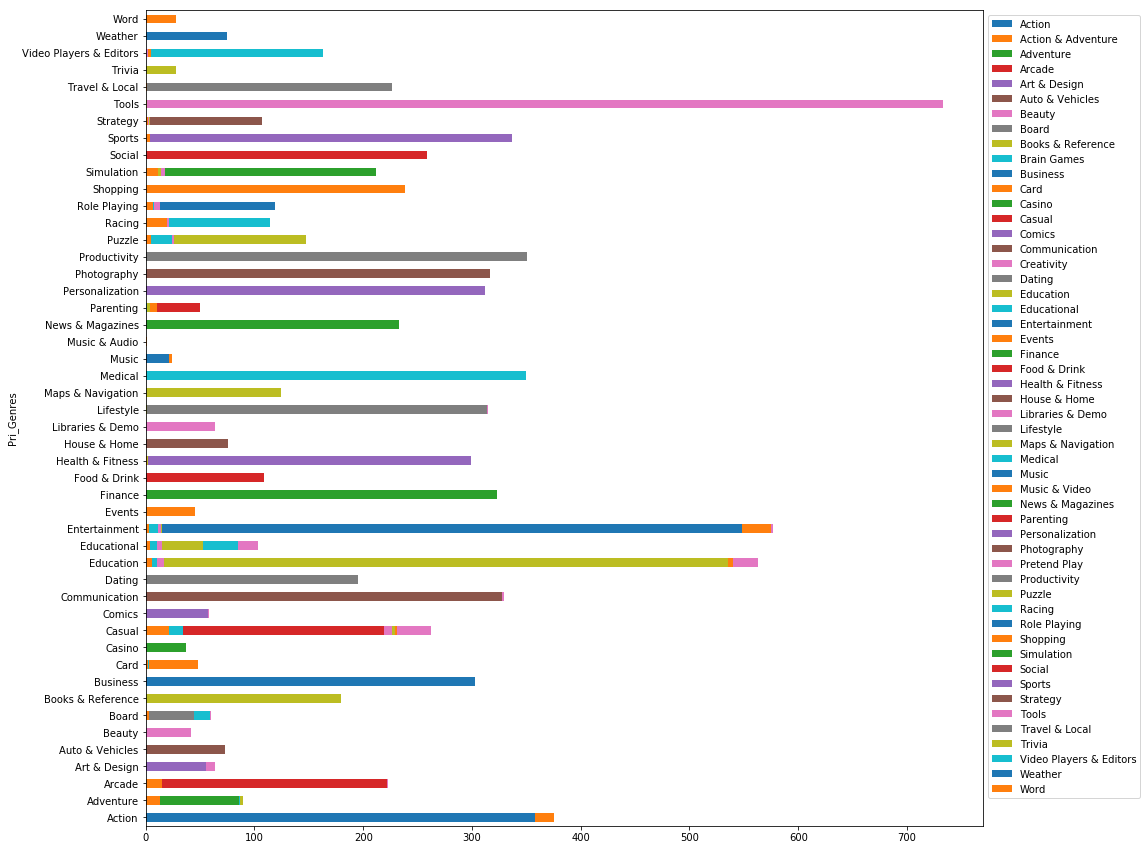

In [42]:
# For visual representation of this data, lets use stacked columns

twowaytable.plot(kind='barh',figsize=(15,15),stacked=True)
plt.legend(bbox_to_anchor=(1.0,1.0))

# Predict the success of  Apps

In [43]:
data.describe()

,Rating,Reviews,Size,Installs,Price
count,9360.000000,9.360000e+03,7.723000e+03,9.360000e+03,9360.000000
mean,4.191838,5.143767e+05,2.297046e+07,1.790875e+07,0.961279
std,0.515263,3.145023e+06,2.344963e+07,9.126637e+07,15.821640
min,1.000000,1.000000e+00,8.500000e+03,1.000000e+00,0.000000
25%,4.000000,1.867500e+02,5.300000e+06,1.000000e+04,0.000000
50%,4.300000,5.955000e+03,1.400000e+07,5.000000e+05,0.000000
75%,4.500000,8.162750e+04,3.300000e+07,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


In [44]:
data['Rating'].describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Which categories have the best overall rating? Also, which category had the most installs? Let's find out!

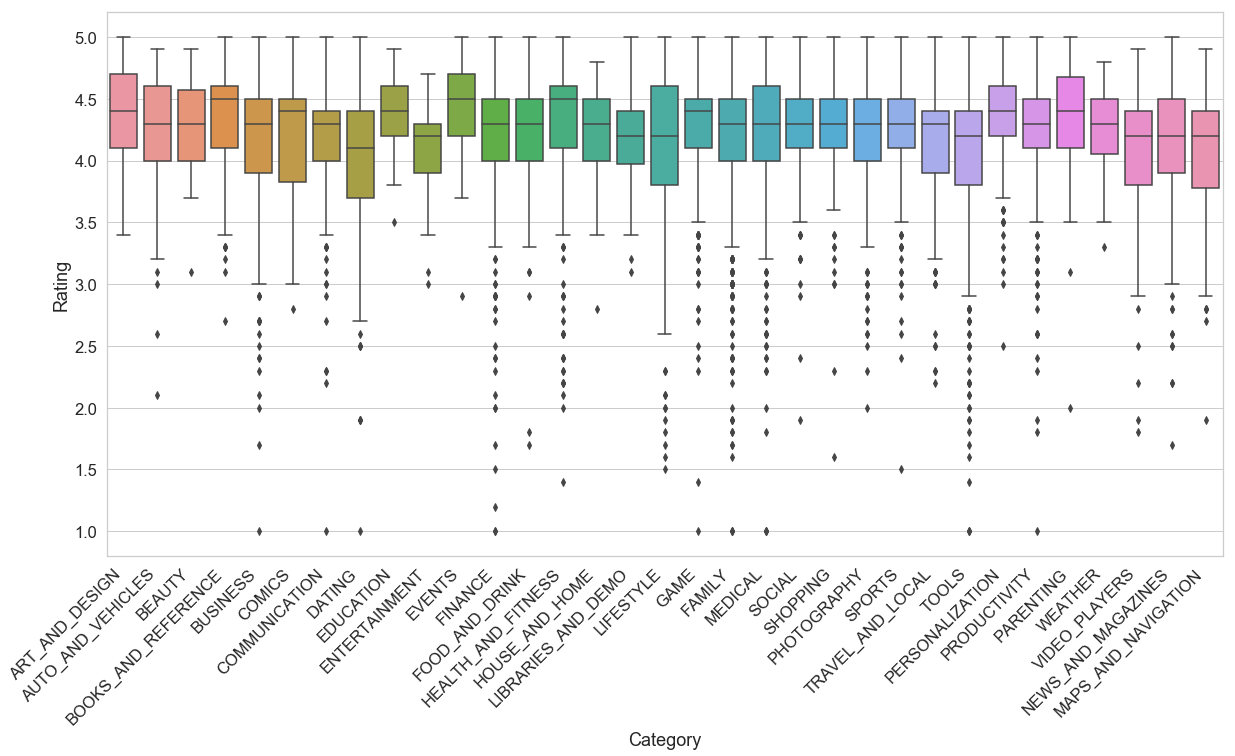

In [45]:
sns.set(rc={'figure.figsize':(20,10)},font_scale=1.5,style='whitegrid')
ax=sns.boxplot(x='Category',y='Rating',data=data)
labels=ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')

All of the categories have close rating averages. In order to further define which categories are the highest rated, we will only look at the data for each category that has more than or equal to 4.0 in rating.

##### Now to analyze the apps which would produce the most ad revenue:

One parameter that would affect ad revenue the most is the number of installs an app has. More installs means more people are opening the app and viewing the embedded ads, hence, there is more money being made. A free application may lead to more installs, however, other parameters may alter how many installs an app will have. Let's see if there is a correlation between installs and other parameters!

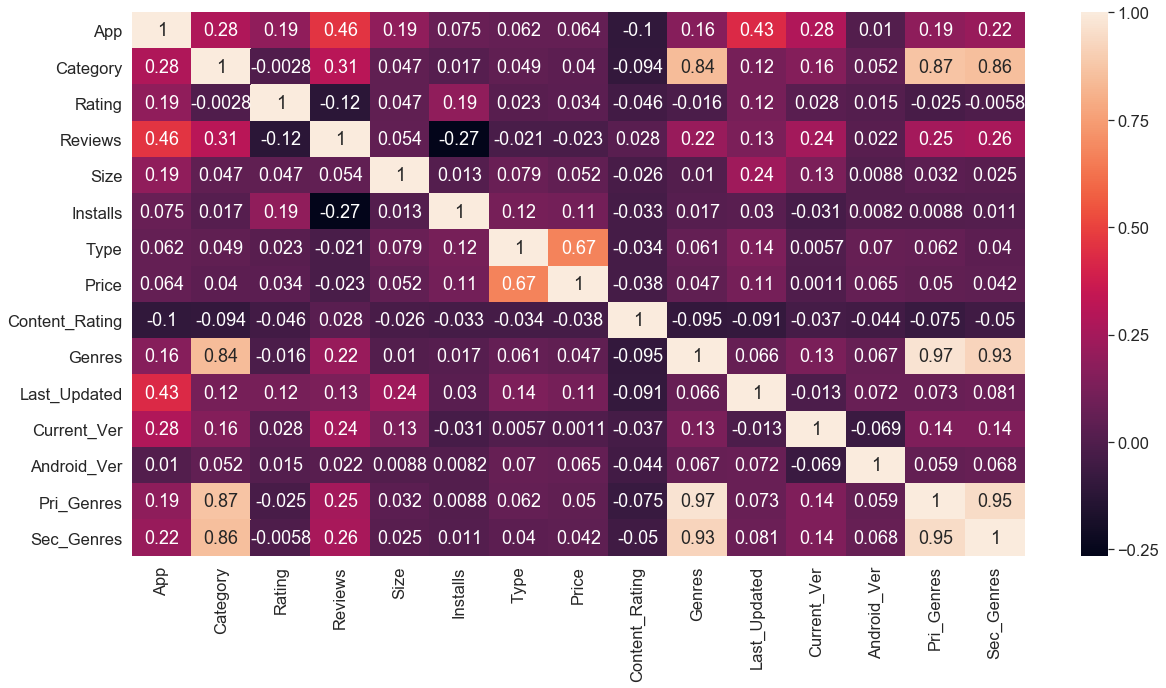

In [46]:
data.dtypes
data['Type']=(data['Type']=='Paid').astype(int)
corr=data.apply(lambda x : x.factorize()[0]).corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)

# Dicision Tree Classifier

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
# Make a copy of cleaned dataset to apply Machine Learning algorithms on it
apps=data.copy()

In [49]:
label_encoder=LabelEncoder()

apps.Category=label_encoder.fit_transform(apps.Category)
apps.Content_Rating=label_encoder.fit_transform(apps.Content_Rating)
apps.Genres=label_encoder.fit_transform(apps.Genres)
apps.dtypes

App                object
Category            int64
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type                int32
Price             float64
Content_Rating      int64
Genres              int64
Last_Updated       object
Current_Ver        object
Android_Ver        object
Pri_Genres         object
Sec_Genres         object
dtype: object

In [50]:
apps=apps.drop(['App','Last_Updated','Current_Ver','Android_Ver'],axis=1)
print('There are {} total rows.'.format(apps.shape[0]))

There are 9360 total rows.


In [51]:
countPop=apps[apps.Installs>100000].count()
print('{} Apps are Popular!'.format(countPop[0]))
print('{} Apps are Unpopular'.format((apps.shape[0]-countPop)[0]))

4945 Apps are Popular!
4415 Apps are Unpopular


In [52]:
apps=apps.drop(['Pri_Genres','Sec_Genres'],axis=1)
apps.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
0,0,4.1,159,19000000.0,10000,0,0.0,1,9
1,0,3.9,967,14000000.0,500000,0,0.0,1,11
2,0,4.7,87510,8700000.0,5000000,0,0.0,1,9
3,0,4.5,215644,25000000.0,50000000,0,0.0,4,9
4,0,4.3,967,2800000.0,100000,0,0.0,1,10


# To predict the Installs of an App

Remove if any nan values

In [53]:
print('Before Cleaing:',apps.shape)
before=apps.shape[0]
apps=apps.dropna(axis=0)
print('After Cleaning',apps.shape)
after=apps.shape[0]
print('Total nan rows remove: {}'.format(before-after))

Before Cleaing: (9360, 9)
After Cleaning (7723, 9)
Total nan rows remove: 1637


In [54]:
# Choose Installs as labels
y_train=apps.Installs
X_train=apps.drop(['Installs'],axis=1)

Split the data into training and testing

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train)

In [56]:
print('X_train shape:{}'.format(X_train.shape))
print('y_train shape:{}'.format(y_train.shape))
print('X_test shape:{}'.format(X_test.shape))
print('y_test shape:{}'.format(y_test.shape))

X_train shape:(5792, 8)
y_train shape:(5792,)
X_test shape:(1931, 8)
y_test shape:(1931,)


# Model Selection

# 1 - Fit the dataset into Decision Tree Classifier

In [57]:
X_train.dtypes

Category            int64
Rating            float64
Reviews             int64
Size              float64
Type                int32
Price             float64
Content_Rating      int64
Genres              int64
dtype: object

In [58]:
from sklearn.svm import SVC

model=SVC(verbose=1,random_state=0)
model.fit(X_train,y_train)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=1)

In [59]:
y_pred=model.predict(X_test)
print('Predicted: ',y_pred[:10])
print('True: ',np.array(y_test[:10]))

Predicted:  [1000000 1000000 1000000 1000000 1000000 1000000 5000000 1000000 1000000
 1000000]
True:  [1000000 1000000  500000    1000  100000   10000 5000000  100000      10
   10000]


In [60]:
# Measure accuracy of classifier
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.21491455204557225

In [61]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(max_leaf_nodes=29)
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=29,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [62]:
y_pred=model.predict(X_test)
print('Predicted: ',y_pred[:10])
print('True: ',np.array(y_test[:10]))

Predicted:  [1000000 1000000  100000   10000 1000000   10000 5000000  100000     100
  100000]
True:  [1000000 1000000  500000    1000  100000   10000 5000000  100000      10
   10000]


In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5484205075090627

In [64]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=30,max_depth=100)
model.fit(X_train,y_train)

c:\users\deepblue\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [65]:
y_pred=model.predict(X_test)
print('Predicted: ',y_pred[:10])
print('True: ',np.array(y_test[:10]))

Predicted:  [1000000 1000000  500000   10000   50000    5000 5000000  100000     100
  100000]
True:  [1000000 1000000  500000    1000  100000   10000 5000000  100000      10
   10000]
